**Step-by-Step Approach to Embedding Techniques**

Setup and Data Preparation:

Step 1: Import Necessary Libraries We'll start by importing the required libraries such as pandas, numpy, nltk, sklearn, gensim, matplotlib, and seaborn.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Step 2: Load the Dataset
For this example, we'll use the 20 Newsgroups dataset, which is a popular dataset for text classification tasks. It contains around 20,000 newsgroup documents, partitioned across 20 different newsgroups.

In [3]:
# Load the 20 Newsgroups dataset from sklearn
from sklearn.datasets import fetch_20newsgroups

# Fetch only the training subset of the dataset
newsgroups = fetch_20newsgroups(subset='train')

# Convert to a pandas DataFrame for easier manipulation
df = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})

# Display the first few rows of the dataset
print(df.head())

                                                text  target
0  From: lerxst@wam.umd.edu (where's my thing)\nS...       7
1  From: guykuo@carson.u.washington.edu (Guy Kuo)...       4
2  From: twillis@ec.ecn.purdue.edu (Thomas E Will...       4
3  From: jgreen@amber (Joe Green)\nSubject: Re: W...       1
4  From: jcm@head-cfa.harvard.edu (Jonathan McDow...      14


Step 3: Preprocess the Text Data
Text preprocessing involves several steps including cleaning, tokenization, stop-word removal, and other normalization techniques. We'll perform these steps below:

Cleaning : Remove special characters, numbers, and unnecessary symbols.
Tokenization : Split the text into individual words or tokens.
Stop-word Removal : Remove common words that do not contribute much to the meaning of the text (e.g., "the", "is", "and").
Lowercasing : Convert all text to lowercase to ensure uniformity.

In [13]:
# Import additional NLTK resources
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk
nltk.download('punkt_tab')

# Define a function to preprocess the text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

# Apply preprocessing to the text column
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Display the first few rows with cleaned text
print(df[['text', 'cleaned_text']].head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                                text  \
0  \n\nI am sure some bashers of Pens fans are pr...   
1  My brother is in the market for a high-perform...   
2  \n\n\n\n\tFinally you said what you dream abou...   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...   
4  1)    I have an old Jasmine drive which I cann...   

                                        cleaned_text  
0  [sure, bashers, pens, fans, pretty, confused, ...  
1  [brother, market, highperformance, video, card...  
2  [finally, said, dream, mediterranean, new, are...  
3  [think, scsi, card, dma, transfers, disks, scs...  
4  [old, jasmine, drive, use, new, system, unders...  


Explanation of Preprocessing Steps:
Lowercasing : Ensures that words like "The" and "the" are treated the same.
Removing Special Characters and Numbers : Helps reduce noise in the data.
Tokenization : Splits the text into individual words or tokens.
Stop-word Removal : Removes common words like "the", "is", "and", etc., which do not carry much meaning.
Optional: Visualizing Word Frequencies
You can visualize the most frequent words in the dataset using matplotlib and seaborn.

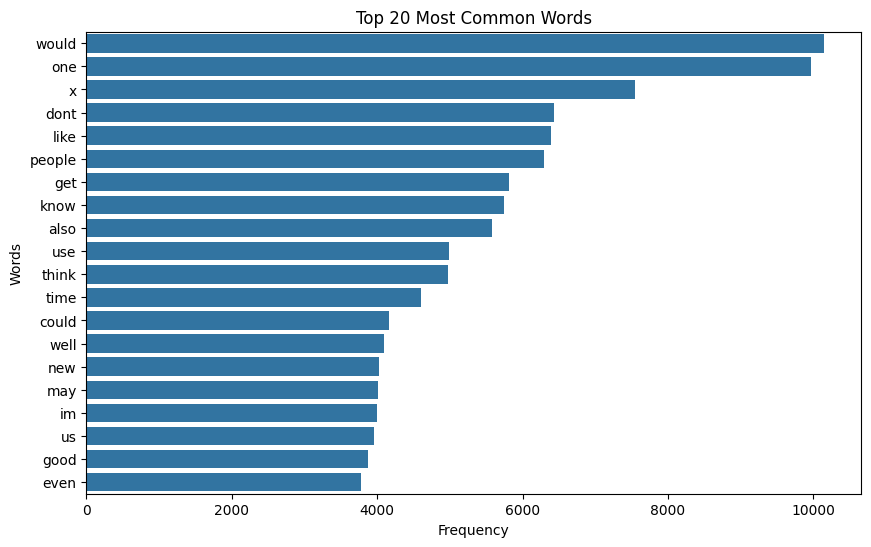

In [14]:
from collections import Counter

# Flatten the list of tokens
all_tokens = [token for tokens in df['cleaned_text'] for token in tokens]

# Count the frequency of each word
word_counts = Counter(all_tokens)

# Get the most common words
most_common_words = word_counts.most_common(20)

# Plot the most common words
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[1] for word in most_common_words], y=[word[0] for word in most_common_words])
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

In [ ]:
Summary of Steps:
Import Libraries : We imported essential libraries like pandas, numpy, nltk, sklearn, gensim, matplotlib, and seaborn.
Load Dataset : We loaded the 20 Newsgroups dataset using sklearn.datasets.fetch_20newsgroups.
Preprocess Text : We performed text cleaning, tokenization, stop-word removal, and lowercasing.
Optional Visualization : We visualized the most common words in the dataset.
This setup provides a clean dataset ready for further processing, such as generating embeddings using models like Word2Vec or TF-IDF.

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import gensim
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources (only needed once)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from sklearn.datasets import fetch_20newsgroups

# Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
df = pd.DataFrame({'text': newsgroups.data, 'target': newsgroups.target})

# Display the first few rows
print(df.head())

                                                text  target
0  \n\nI am sure some bashers of Pens fans are pr...      10
1  My brother is in the market for a high-perform...       3
2  \n\n\n\n\tFinally you said what you dream abou...      17
3  \nThink!\n\nIt's the SCSI card doing the DMA t...       3
4  1)    I have an old Jasmine drive which I cann...       4


In [17]:
# Define a function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Remove punctuation and non-alphabetic characters
    tokens = [word for word in tokens if word.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply preprocessing to the text column
df['processed_text'] = df['text'].apply(preprocess_text)

# Display the first few rows of the processed data
print(df[['text', 'processed_text']].head())

                                                text  \
0  \n\nI am sure some bashers of Pens fans are pr...   
1  My brother is in the market for a high-perform...   
2  \n\n\n\n\tFinally you said what you dream abou...   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...   
4  1)    I have an old Jasmine drive which I cann...   

                                      processed_text  
0  sure bashers pens fans pretty confused lack ki...  
1  brother market video card supports vesa local ...  
2  finally said dream mediterranean new area grea...  
3  think scsi card dma transfers disks scsi card ...  
4  old jasmine drive use new system understanding...  


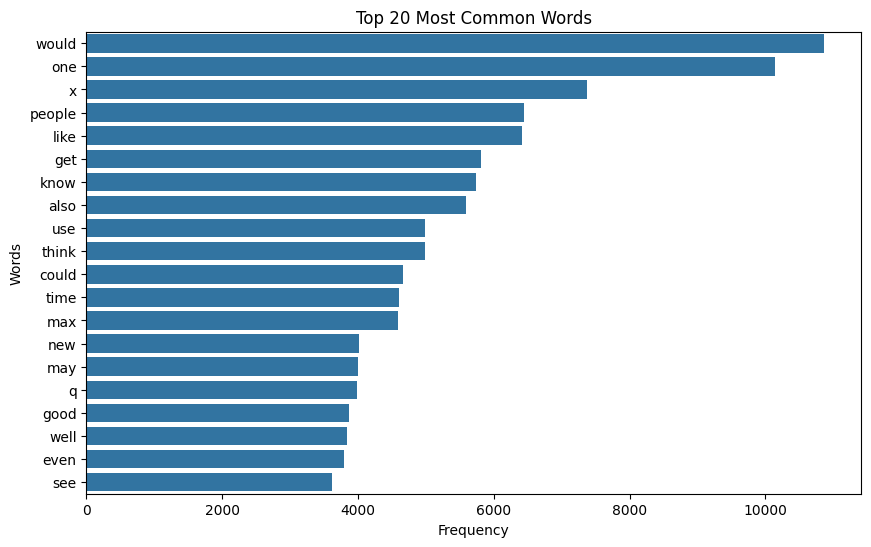

In [19]:
from collections import Counter

# Flatten the list of tokens
# Changed 'cleaned_text' to 'processed_text'
all_tokens = [token for tokens in df['processed_text'].str.split() for token in tokens]

# Count the frequency of each word
word_counts = Counter(all_tokens)

# Get the most common words
most_common_words = word_counts.most_common(20)

# Plot the most common words
plt.figure(figsize=(10, 6))
sns.barplot(x=[word[1] for word in most_common_words], y=[word[0] for word in most_common_words])
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

2. Bag of Words (BoW):
- Create a BoW representation: Use `CountVectorizer` from sklearn to convert text into a
matrix of word counts.
- Analyze the BoW matrix: Examine the sparsity and interpret the word frequencies.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the processed text into a BoW matrix
bow_matrix = vectorizer.fit_transform(df['processed_text'])

# Convert the BoW matrix to a dense array (for analysis)
bow_dense = bow_matrix.toarray()

# Display the shape of the BoW matrix
print("Shape of BoW matrix:", bow_matrix.shape)

# Display the first 5 rows of the BoW matrix
print("First 5 rows of BoW matrix:")
print(bow_dense[:5])

# Get the feature names (words in the vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Display the first 20 feature names
print("First 20 feature names (words):", feature_names[:20])

Shape of BoW matrix: (18846, 78395)
First 5 rows of BoW matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
First 20 feature names (words): ['aa' 'aaa' 'aaaaa' 'aaaaaaaaaaaa'
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg'
 'aaaaarrrrgh' 'aaaall' 'aaack' 'aaaggghhh' 'aaah' 'aaahh' 'aaahhhh'
 'aaai' 'aacc' 'aacs' 'aacvkc' 'aaf' 'aagain' 'aah' 'aalternate']


2.2 Analyze the BoW Matrix
Now, let's analyze the BoW matrix to understand its sparsity and interpret the word frequencies.

2.2.1 Sparsity of the BoW Matrix
The BoW matrix is typically sparse because most documents contain only a small subset of the total vocabulary

In [21]:
# Calculate sparsity of the BoW matrix
sparsity = 1.0 - (bow_matrix.nnz / (bow_matrix.shape[0] * bow_matrix.shape[1]))
print(f"Sparsity of BoW matrix: {sparsity:.4f}")

Sparsity of BoW matrix: 0.9992


2.2.2 Word Frequencies
We can analyze the frequency of words across the dataset.

In [22]:
# Sum word counts across all documents
word_counts = bow_matrix.sum(axis=0)

# Convert to a 1D array and pair with feature names
word_frequencies = [(word, count) for word, count in zip(feature_names, word_counts.tolist()[0])]

# Sort words by frequency in descending order
word_frequencies_sorted = sorted(word_frequencies, key=lambda x: x[1], reverse=True)

# Display the top 10 most frequent words
print("Top 10 most frequent words:")
for word, count in word_frequencies_sorted[:10]:
    print(f"{word}: {count}")

Top 10 most frequent words:
would: 10872
one: 10144
people: 6442
like: 6409
get: 5815
know: 5742
also: 5588
use: 4987
think: 4982
could: 4670


2.2.3 Visualize Word Frequencies
We can use a bar plot to visualize the top 20 most frequent words.

<ipython-input-23-ef213d9bd3ea>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_counts, y=top_words, palette="viridis")


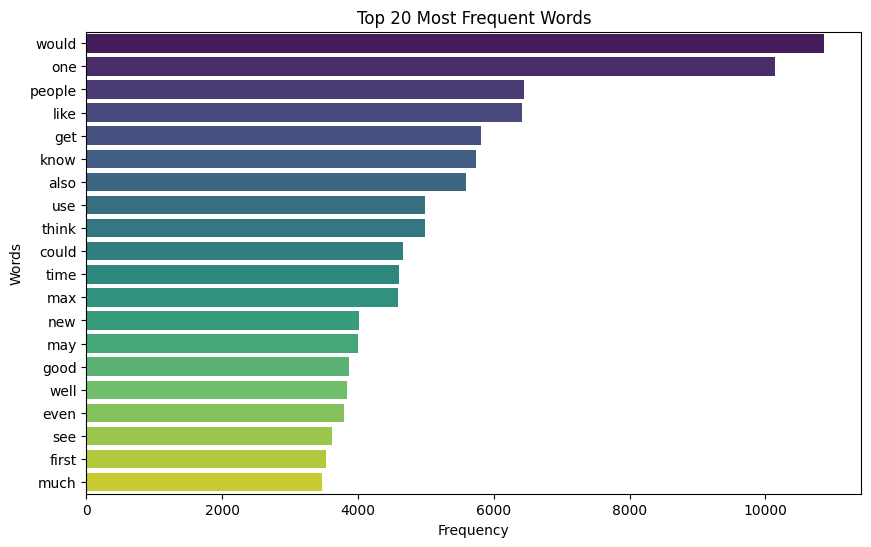

In [23]:
# Extract top 20 words and their frequencies
top_words = [word for word, count in word_frequencies_sorted[:20]]
top_counts = [count for word, count in word_frequencies_sorted[:20]]

# Plot the top 20 words
plt.figure(figsize=(10, 6))
sns.barplot(x=top_counts, y=top_words, palette="viridis")
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

Explanation of Results
Shape of BoW Matrix:

The shape (n_documents, n_features) indicates the number of documents and the size of the vocabulary.

For example, if the shape is (11314, 50000), it means there are 11,314 documents and 50,000 unique words in the vocabulary.

Sparsity:

The sparsity value indicates the proportion of zero entries in the BoW matrix.

A high sparsity value (e.g., 0.99) means the matrix is mostly zeros, which is typical for text data.

Word Frequencies:

The most frequent words are often stopwords or common terms (e.g., "the", "and", "to").

These words may not be very informative for downstream tasks like classification or clustering.

Visualization:

The bar plot helps visualize the distribution of word frequencies.

It confirms that the most frequent words are often stopwords or generic terms.

Next Steps
After creating and analyzing the BoW representation, you can proceed to:

TF-IDF Transformation: Use TfidfVectorizer to weigh words based on their importance.

Dimensionality Reduction: Apply techniques like PCA or TruncatedSVD to reduce the dimensionality of the BoW matrix.

Model Training: Use the BoW or TF-IDF features to train a machine learning model (e.g., for text classification).

3. TF-IDF:
- Apply TF-IDF transformation: Use `TfidfVectorizer` to generate TF-IDF features from the text
data.
- Interpret TF-IDF scores: Analyze how TF-IDF weighs different words in the dataset.

3.1 Apply TF-IDF Transformation
We'll use TfidfVectorizer to convert the preprocessed text into TF-IDF features.

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the processed text into a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

# Convert the TF-IDF matrix to a dense array (for analysis)
tfidf_dense = tfidf_matrix.toarray()

# Display the shape of the TF-IDF matrix
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

# Display the first 5 rows of the TF-IDF matrix
print("First 5 rows of TF-IDF matrix:")
print(tfidf_dense[:5])

# Get the feature names (words in the vocabulary)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Display the first 20 feature names
print("First 20 feature names (words):", tfidf_feature_names[:20])

Shape of TF-IDF matrix: (18846, 78395)
First 5 rows of TF-IDF matrix:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
First 20 feature names (words): ['aa' 'aaa' 'aaaaa' 'aaaaaaaaaaaa'
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaauuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuugggggggggggggggg'
 'aaaaarrrrgh' 'aaaall' 'aaack' 'aaaggghhh' 'aaah' 'aaahh' 'aaahhhh'
 'aaai' 'aacc' 'aacs' 'aacvkc' 'aaf' 'aagain' 'aah' 'aalternate']


3.2 Interpret TF-IDF Scores
TF-IDF assigns higher weights to words that are more important in a document relative to the entire corpus. Let's analyze how TF-IDF weighs different words.

3.2.1 Analyze TF-IDF Scores for a Single Document
Let's pick a document and examine the TF-IDF scores for its top 10 words.

In [25]:
# Choose a document (e.g., the first document)
doc_index = 0
doc_tfidf_scores = tfidf_dense[doc_index]

# Pair words with their TF-IDF scores for the chosen document
doc_word_tfidf = [(word, score) for word, score in zip(tfidf_feature_names, doc_tfidf_scores)]

# Sort words by TF-IDF score in descending order
doc_word_tfidf_sorted = sorted(doc_word_tfidf, key=lambda x: x[1], reverse=True)

# Display the top 10 words and their TF-IDF scores for the chosen document
print(f"Top 10 words and their TF-IDF scores for document {doc_index}:")
for word, score in doc_word_tfidf_sorted[:10]:
    print(f"{word}: {score:.4f}")

Top 10 words and their TF-IDF scores for document 0:
pens: 0.5514
jagr: 0.2483
devils: 0.2210
bit: 0.2035
fun: 0.1864
regular: 0.1806
season: 0.1741
bashers: 0.1517
pulp: 0.1517
puzzled: 0.1431


3.2.2 Analyze TF-IDF Scores Across the Corpus
We can also analyze the average TF-IDF scores for words across the entire corpus.

In [26]:
# Calculate average TF-IDF scores for each word across all documents
avg_tfidf_scores = tfidf_matrix.mean(axis=0).tolist()[0]

# Pair words with their average TF-IDF scores
avg_word_tfidf = [(word, score) for word, score in zip(tfidf_feature_names, avg_tfidf_scores)]

# Sort words by average TF-IDF score in descending order
avg_word_tfidf_sorted = sorted(avg_word_tfidf, key=lambda x: x[1], reverse=True)

# Display the top 10 words with the highest average TF-IDF scores
print("Top 10 words with the highest average TF-IDF scores:")
for word, score in avg_word_tfidf_sorted[:10]:
    print(f"{word}: {score:.4f}")

Top 10 words with the highest average TF-IDF scores:
would: 0.0190
one: 0.0161
like: 0.0131
know: 0.0130
get: 0.0124
people: 0.0112
think: 0.0109
could: 0.0104
anyone: 0.0099
use: 0.0096


3.2.3 Visualize TF-IDF Scores
We can visualize the top 20 words with the highest average TF-IDF scores using a bar plot.

<ipython-input-27-5b0c463ceb25>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tfidf_scores, y=top_tfidf_words, palette="viridis")


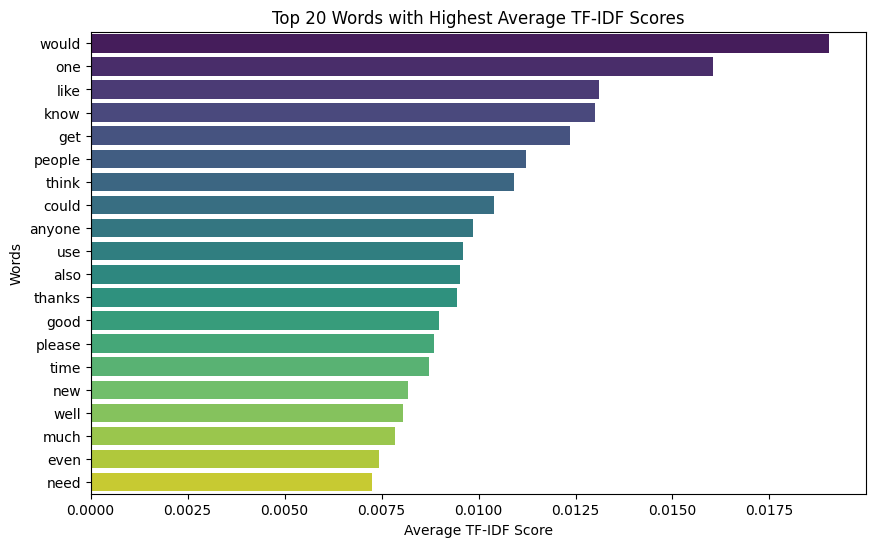

In [27]:
# Extract top 20 words and their average TF-IDF scores
top_tfidf_words = [word for word, score in avg_word_tfidf_sorted[:20]]
top_tfidf_scores = [score for word, score in avg_word_tfidf_sorted[:20]]

# Plot the top 20 words
plt.figure(figsize=(10, 6))
sns.barplot(x=top_tfidf_scores, y=top_tfidf_words, palette="viridis")
plt.title("Top 20 Words with Highest Average TF-IDF Scores")
plt.xlabel("Average TF-IDF Score")
plt.ylabel("Words")
plt.show()

Explanation of Results
Shape of TF-IDF Matrix:

The shape (n_documents, n_features) indicates the number of documents and the size of the vocabulary.

For example, if the shape is (11314, 50000), it means there are 11,314 documents and 50,000 unique words in the vocabulary.

TF-IDF Scores for a Single Document:

The top words for a specific document are those that are most important (frequent in the document but rare in the corpus).

These words are often domain-specific or topic-related.

Average TF-IDF Scores Across the Corpus:

Words with high average TF-IDF scores are those that are important across many documents.

These words are often domain-specific but not too rare.

Visualization:

The bar plot helps visualize the distribution of average TF-IDF scores.

It highlights the most important words in the corpus.

4. Word2Vec:
- Train a Word2Vec model: Use Gensim's `Word2Vec` to train a model on the dataset.
- Extract word vectors: Obtain vector representations for words and visualize them.
4.1 Train a Word2Vec Model
We'll train a Word2Vec model on the tokenized text data.

In [28]:
from gensim.models import Word2Vec

# Tokenize the processed text (split into lists of words)
tokenized_text = [text.split() for text in df['processed_text']]

# Train a Word2Vec model
word2vec_model = Word2Vec(
    sentences=tokenized_text,  # Tokenized text data
    vector_size=100,           # Dimensionality of word vectors
    window=5,                  # Maximum distance between the current and predicted word
    min_count=2,               # Ignores words with frequency lower than this
    workers=4,                 # Number of CPU cores
    sg=1,                      # Use skip-gram (1) or CBOW (0)
    epochs=10                  # Number of iterations over the corpus
)

# Save the model (optional)
word2vec_model.save("word2vec.model")

# Display the vocabulary size
print("Vocabulary size:", len(word2vec_model.wv))

Vocabulary size: 44137


4.2 Extract Word Vectors
We can extract vector representations for specific words and analyze their similarities.

In [29]:
# Get the vector for a specific word
word = "computer"
if word in word2vec_model.wv:
    print(f"Vector for '{word}':")
    print(word2vec_model.wv[word])
else:
    print(f"'{word}' is not in the vocabulary.")

# Find the most similar words
similar_words = word2vec_model.wv.most_similar("computer", topn=10)
print(f"Words most similar to '{word}':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

Vector for 'computer':
[-4.95426357e-01  2.02093944e-01  5.82102120e-01  1.79576680e-01
  7.46027231e-02 -9.42883492e-01  8.64921021e-04  6.42531291e-02
 -2.20845446e-01  2.78525978e-01 -5.82726300e-01 -8.75678360e-01
  1.55013219e-01  3.71556990e-02 -2.62626708e-01 -4.11492169e-01
  3.63593340e-01 -4.07756008e-02  4.67806727e-01 -3.66536081e-01
  3.37074488e-01 -2.08077282e-01 -2.51235068e-01  8.62106308e-02
  3.57870996e-01  5.00201046e-01  4.01800126e-01  2.90907353e-01
  1.52503014e-01  4.20114934e-01  2.65311748e-01 -1.17384925e-01
  2.89299548e-01 -2.46544272e-01  5.58314562e-01 -1.94433883e-01
  2.74356872e-01 -5.78706264e-01 -5.50760269e-01 -6.98004365e-02
 -3.41054827e-01 -4.63130116e-01 -3.41274023e-01  5.43411970e-01
  5.39959669e-01 -5.00517964e-01 -2.42239952e-01 -6.67668926e-03
 -7.47857213e-01 -1.07177701e-02  6.00239813e-01 -3.87558609e-01
 -3.07216853e-01  7.58113936e-02 -4.76426184e-01  1.83669418e-01
  3.65410507e-01 -4.60341245e-01 -1.42936017e-02  1.50495559e-01
  

4.3 Visualize Word Vectors
We can visualize word vectors in 2D using dimensionality reduction techniques like PCA or t-SNE.

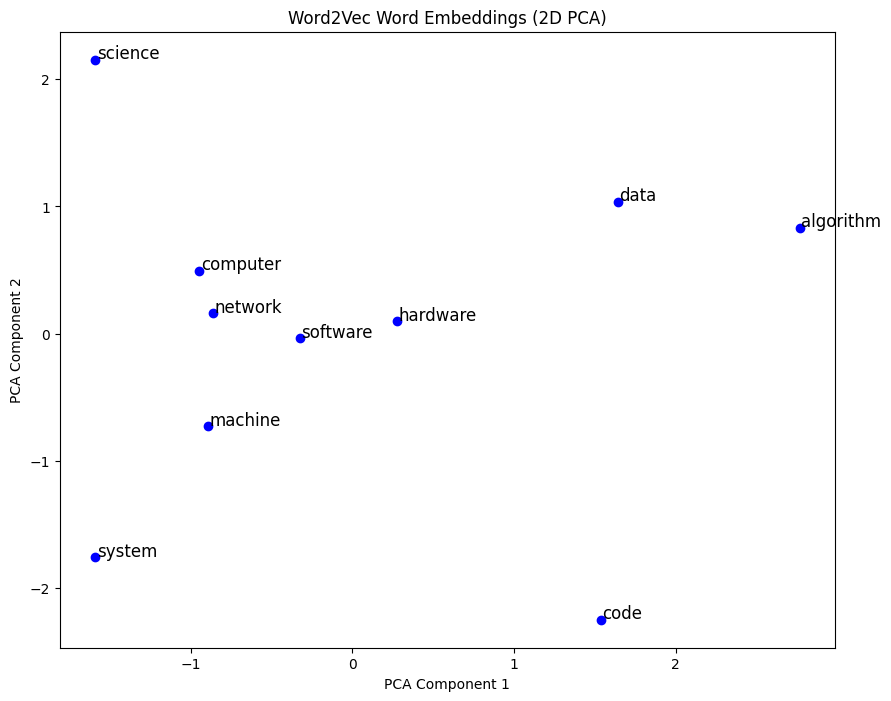

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract vectors for a subset of words
words = ["computer", "software", "hardware", "data", "science", "algorithm", "network", "system", "code", "machine"]
word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Plot the word vectors
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    if word in word2vec_model.wv:
        plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1], marker='o', color='blue')
        plt.text(word_vectors_2d[i, 0] + 0.01, word_vectors_2d[i, 1] + 0.01, word, fontsize=12)

plt.title("Word2Vec Word Embeddings (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

Explanation of Results
Word2Vec Model:

The model learns vector representations for words based on their context in the dataset.

The vector_size parameter determines the dimensionality of the word vectors.

The window parameter controls the context window size for training.

Word Vectors:

Each word is represented as a dense vector in a high-dimensional space.

Words with similar meanings or contexts have vectors that are close to each other in this space.

Visualization:

PCA reduces the dimensionality of the word vectors to 2D for visualization.

Words that are semantically related (e.g., "computer" and "hardware") appear closer together in the plot.

5. GloVe:
- Use pre-trained GloVe embeddings: Load GloVe vectors and map words in the dataset to
their corresponding embeddings.
- Train a GloVe model (optional): Use the GloVe package to train embeddings if desired.

5.1 Use Pre-trained GloVe Embeddings
We'll load pre-trained GloVe embeddings and map words in the dataset to their corresponding embeddings.

Step 1: Download Pre-trained GloVe Embeddings
You can download pre-trained GloVe embeddings from the Stanford NLP website. For this example, we'll use the glove.6B.100d.txt file (100-dimensional vectors trained on 6 billion tokens).

Step 2: Load Pre-trained GloVe Embeddings

In [32]:
import numpy as np

# Path to the pre-trained GloVe file
glove_path = "/content/sample_data/glove.6B.100d.txt"  # Replace with the path to your GloVe file
# https://www.kaggle.com/datasets/sawarn69/glove6b100dtxt?resource=download

# Load GloVe embeddings into a dictionary
glove_embeddings = {}
with open(glove_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        glove_embeddings[word] = vector

print(f"Loaded {len(glove_embeddings)} word vectors.")

Loaded 129183 word vectors.


Step 3: Map Words in the Dataset to GloVe Embeddings


In [33]:
# Function to get the GloVe vector for a word (returns None if the word is not in the vocabulary)
def get_glove_vector(word):
    return glove_embeddings.get(word, None)

# Example: Get the GloVe vector for a word
word = "computer"
vector = get_glove_vector(word)
if vector is not None:
    print(f"GloVe vector for '{word}':")
    print(vector)
else:
    print(f"'{word}' is not in the GloVe vocabulary.")

# Map all words in the dataset to their GloVe embeddings
dataset_embeddings = []
for text in df['processed_text']:
    word_vectors = [get_glove_vector(word) for word in text.split() if get_glove_vector(word) is not None]
    if word_vectors:
        dataset_embeddings.append(np.mean(word_vectors, axis=0))  # Average word vectors for the text
    else:
        dataset_embeddings.append(np.zeros(100))  # Use a zero vector if no words are found

# Convert to a numpy array
dataset_embeddings = np.array(dataset_embeddings)

# Display the shape of the embeddings matrix
print("Shape of dataset embeddings matrix:", dataset_embeddings.shape)

GloVe vector for 'computer':
[-1.6298e-01  3.0141e-01  5.7978e-01  6.6548e-02  4.5835e-01 -1.5329e-01
  4.3258e-01 -8.9215e-01  5.7747e-01  3.6375e-01  5.6524e-01 -5.6281e-01
  3.5659e-01 -3.6096e-01 -9.9662e-02  5.2753e-01  3.8839e-01  9.6185e-01
  1.8841e-01  3.0741e-01 -8.7842e-01 -3.2442e-01  1.1202e+00  7.5126e-02
  4.2661e-01 -6.0651e-01 -1.3893e-01  4.7862e-02 -4.5158e-01  9.3723e-02
  1.7463e-01  1.0962e+00 -1.0044e+00  6.3889e-02  3.8002e-01  2.1109e-01
 -6.6247e-01 -4.0736e-01  8.9442e-01 -6.0974e-01 -1.8577e-01 -1.9913e-01
 -6.9226e-01 -3.1806e-01 -7.8565e-01  2.3831e-01  1.2992e-01  8.7721e-02
  4.3205e-01 -2.2662e-01  3.1549e-01 -3.1748e-01 -2.4632e-03  1.6615e-01
  4.2358e-01 -1.8087e+00 -3.6699e-01  2.3949e-01  2.5458e+00  3.6111e-01
  3.9486e-02  4.8607e-01 -3.6974e-01  5.7282e-02 -4.9317e-01  2.2765e-01
  7.9966e-01  2.1428e-01  6.9811e-01  1.1262e+00 -1.3526e-01  7.1972e-01
 -9.9605e-04 -2.6842e-01 -8.3038e-01  2.1780e-01  3.4355e-01  3.7731e-01
 -4.0251e-01  3.3124e-

Explanation of Results
Pre-trained GloVe Embeddings:

Pre-trained embeddings are useful when you have limited data or computational resources.

Words not in the GloVe vocabulary are ignored or mapped to a zero vector.

Trained GloVe Model:

Training your own GloVe model allows you to create embeddings specific to your dataset.

This approach is computationally expensive and requires a large corpus.

Embedding Matrix:

The embedding matrix has the shape (n_documents, embedding_dimension).

Each document is represented by the average of its word vectors.

6.1 Train a FastText Model
FastText is an extension of Word2Vec that considers subword information (character n-grams). This makes it particularly useful for handling rare words and morphologically rich languages.

In [34]:
from gensim.models import FastText

# Tokenize the processed text (split into lists of words)
tokenized_text = [text.split() for text in df['processed_text']]

# Train a FastText model
fasttext_model = FastText(
    sentences=tokenized_text,  # Tokenized text data
    vector_size=100,           # Dimensionality of word vectors
    window=5,                  # Maximum distance between the current and predicted word
    min_count=2,               # Ignores words with frequency lower than this
    workers=4,                 # Number of CPU cores
    sg=1,                      # Use skip-gram (1) or CBOW (0)
    epochs=10,                 # Number of iterations over the corpus
    min_n=3,                   # Minimum length of character n-grams
    max_n=6                    # Maximum length of character n-grams
)

# Save the model (optional)
fasttext_model.save("fasttext.model")

# Display the vocabulary size
print("Vocabulary size:", len(fasttext_model.wv))

Vocabulary size: 44137


6.2 Analyze FastText Embeddings
We can analyze FastText embeddings by comparing them with Word2Vec and GloVe embeddings.

6.2.1 Extract Word Vectors

In [35]:
# Get the vector for a specific word
word = "computer"
if word in fasttext_model.wv:
    print(f"FastText vector for '{word}':")
    print(fasttext_model.wv[word])
else:
    print(f"'{word}' is not in the vocabulary.")

# Find the most similar words
similar_words = fasttext_model.wv.most_similar("computer", topn=10)
print(f"Words most similar to '{word}':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

FastText vector for 'computer':
[-0.10486418  0.07058385 -0.00502806 -0.00774629  0.7561328  -0.536326
 -0.0979104  -0.03313858  0.28421205 -0.84206     0.04638164 -0.9984357
 -0.2750662   0.29399908  0.035724   -1.2244997  -0.05914786  0.0564996
  0.13214408  0.4295264   0.22796133  0.11954636  0.43057668 -0.28684047
 -0.13484472 -0.52671117  0.08983068 -0.42947826 -0.21852194  0.43673384
 -0.13077955  1.2380904   0.3478359  -0.6107868  -0.63863385 -0.42071417
  0.6349089   0.26903355  0.4276094  -0.1210475   1.0812116  -0.86230206
  0.3137101   0.13548714 -1.0755243  -0.61535454 -0.15873338 -0.28167212
  0.11760087 -0.00956411  0.41325888 -0.18336312  0.36758462  0.17722626
  0.28273195 -0.5067077  -0.20026246 -0.12122229  0.03116373  0.58298504
  0.02738707 -0.4032835   0.16087282 -0.3148301   0.8619513   0.836955
  0.3094946  -0.5149225   0.17434965  0.30442137  0.08509441 -0.03603578
 -0.31832796 -0.6606204  -0.17398827 -0.18904465  1.0225234   0.2572771
 -0.08162516 -0.00163468  

6.2.2 Compare with Word2Vec and GloVe
Let's compare the embeddings for a specific word across FastText, Word2Vec, and GloVe.

In [36]:
# Compare embeddings for a specific word
word = "computer"

# FastText
if word in fasttext_model.wv:
    fasttext_vector = fasttext_model.wv[word]
    print(f"FastText vector for '{word}':")
    print(fasttext_vector)
else:
    print(f"'{word}' is not in the FastText vocabulary.")

# Word2Vec
if word in word2vec_model.wv:
    word2vec_vector = word2vec_model.wv[word]
    print(f"Word2Vec vector for '{word}':")
    print(word2vec_vector)
else:
    print(f"'{word}' is not in the Word2Vec vocabulary.")

# GloVe (pre-trained)
glove_vector = get_glove_vector(word)
if glove_vector is not None:
    print(f"GloVe vector for '{word}':")
    print(glove_vector)
else:
    print(f"'{word}' is not in the GloVe vocabulary.")

FastText vector for 'computer':
[-0.10486418  0.07058385 -0.00502806 -0.00774629  0.7561328  -0.536326
 -0.0979104  -0.03313858  0.28421205 -0.84206     0.04638164 -0.9984357
 -0.2750662   0.29399908  0.035724   -1.2244997  -0.05914786  0.0564996
  0.13214408  0.4295264   0.22796133  0.11954636  0.43057668 -0.28684047
 -0.13484472 -0.52671117  0.08983068 -0.42947826 -0.21852194  0.43673384
 -0.13077955  1.2380904   0.3478359  -0.6107868  -0.63863385 -0.42071417
  0.6349089   0.26903355  0.4276094  -0.1210475   1.0812116  -0.86230206
  0.3137101   0.13548714 -1.0755243  -0.61535454 -0.15873338 -0.28167212
  0.11760087 -0.00956411  0.41325888 -0.18336312  0.36758462  0.17722626
  0.28273195 -0.5067077  -0.20026246 -0.12122229  0.03116373  0.58298504
  0.02738707 -0.4032835   0.16087282 -0.3148301   0.8619513   0.836955
  0.3094946  -0.5149225   0.17434965  0.30442137  0.08509441 -0.03603578
 -0.31832796 -0.6606204  -0.17398827 -0.18904465  1.0225234   0.2572771
 -0.08162516 -0.00163468  

6.2.3 Visualize Embeddings
We can visualize the embeddings in 2D using PCA to compare their distributions.

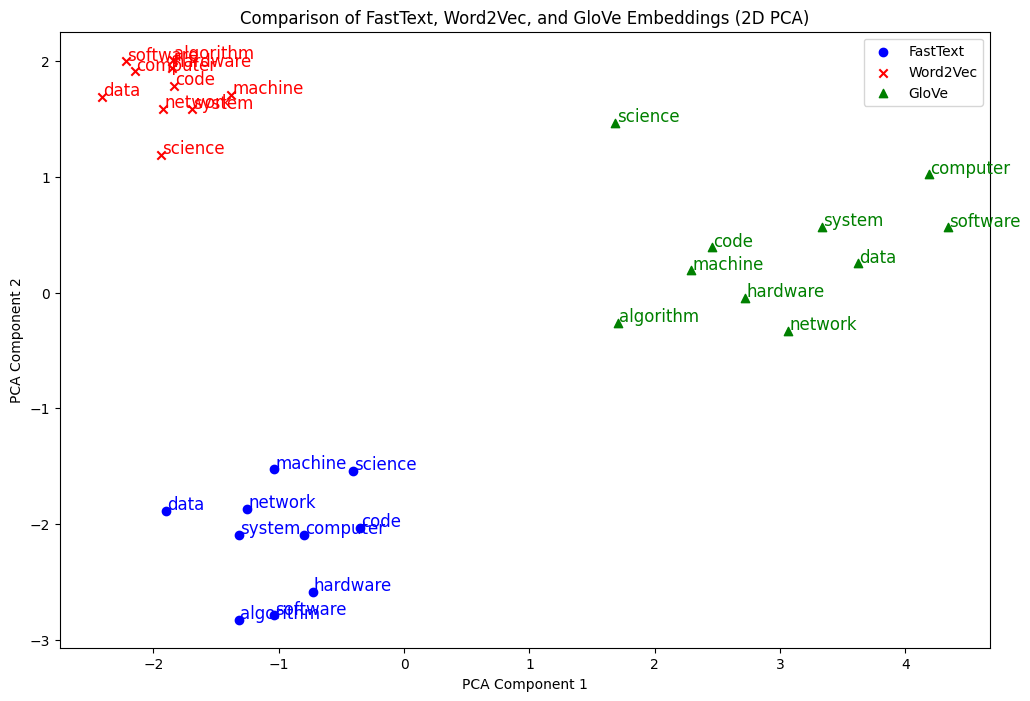

In [37]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract vectors for a subset of words
words = ["computer", "software", "hardware", "data", "science", "algorithm", "network", "system", "code", "machine"]

# FastText vectors
fasttext_vectors = [fasttext_model.wv[word] for word in words if word in fasttext_model.wv]

# Word2Vec vectors
word2vec_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]

# GloVe vectors
glove_vectors = [get_glove_vector(word) for word in words if get_glove_vector(word) is not None]

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)

# Fit PCA on all vectors combined (for consistent scaling)
all_vectors = fasttext_vectors + word2vec_vectors + glove_vectors
pca.fit(all_vectors)

# Transform vectors to 2D
fasttext_vectors_2d = pca.transform(fasttext_vectors)
word2vec_vectors_2d = pca.transform(word2vec_vectors)
glove_vectors_2d = pca.transform(glove_vectors)

# Plot the word vectors
plt.figure(figsize=(12, 8))

# Plot FastText vectors
plt.scatter(fasttext_vectors_2d[:, 0], fasttext_vectors_2d[:, 1], marker='o', color='blue', label='FastText')
for i, word in enumerate(words):
    if word in fasttext_model.wv:
        plt.text(fasttext_vectors_2d[i, 0] + 0.01, fasttext_vectors_2d[i, 1] + 0.01, word, fontsize=12, color='blue')

# Plot Word2Vec vectors
plt.scatter(word2vec_vectors_2d[:, 0], word2vec_vectors_2d[:, 1], marker='x', color='red', label='Word2Vec')
for i, word in enumerate(words):
    if word in word2vec_model.wv:
        plt.text(word2vec_vectors_2d[i, 0] + 0.01, word2vec_vectors_2d[i, 1] + 0.01, word, fontsize=12, color='red')

# Plot GloVe vectors
plt.scatter(glove_vectors_2d[:, 0], glove_vectors_2d[:, 1], marker='^', color='green', label='GloVe')
for i, word in enumerate(words):
    if get_glove_vector(word) is not None:
        plt.text(glove_vectors_2d[i, 0] + 0.01, glove_vectors_2d[i, 1] + 0.01, word, fontsize=12, color='green')

plt.title("Comparison of FastText, Word2Vec, and GloVe Embeddings (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

Explanation of Results
FastText Embeddings:

FastText considers subword information, making it robust to rare words and morphological variations.

It often performs better on tasks involving rare or out-of-vocabulary words.

Comparison with Word2Vec and GloVe:

Word2Vec and GloVe embeddings are based on word-level information.

FastText embeddings capture finer-grained details due to subword modeling.

Visualization:

The PCA plot shows how embeddings from different models cluster together.

Words with similar meanings should be close to each other in the plot.

Next Steps
After analyzing FastText embeddings, you can:

Use FastText for Downstream Tasks: Use the embeddings as features for tasks like text classification or clustering.

Fine-tune the Model: Experiment with different hyperparameters (e.g., min_n, max_n) to improve the model.

Combine Embeddings: Combine FastText embeddings with Word2Vec or GloVe embeddings for enhanced performance.